# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crypto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50025.60
The current value of your 5.3 ETH is $16456.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = "ALPACA_API_KEY"
alpaca_secret_key = "ALPACA_SECRET_KEY"

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [11]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-01-04 00:00:00-05:00  118.08  118.1400  117.9850  118.040  6211938   
2021-01-05 00:00:00-05:00  118.06  118.0600  117.7500  117.915  5915389   
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.360  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.210  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.090  5580443   
...                           ...       ...       ...      ...      ...   
2022-01-03 00:00:00-05:00  113.67  113.6753  113.3100  113.310  8906643   
2022-01-04 00:00:00-05:00  113.22  113.3000  113.0750  113.290  7615698   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.9000  112.930  7686662   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.6600  112.810  6812819   
2022-01-07 00:00:00-05:00  112.69  112.7050  112.3400  112.500  8338975   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-01-04 00:00:00-05:00  375.31  375.45  364.8200  368.85  92938087  
2021-01-05 00:00:00-05:00  368.10  372.50  368.0500  371.32  53668865  
2021-01-06 00:00:00-05:00  369.71  376.98  369.1200  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.90  375.9100  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466  
...                           ...     ...       ...     ...       ...  
2022-01-03 00:00:00-05:00  476.32  477.85  473.8500  477.76  56128214  
2022-01-04 00:00:00-05:00  479.22  479.98  475.5800  477.51  59093344  
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.38  87411658  
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.93  78577470  
2022-01-07 00:00:00-05:00  467.95  469.20  464.6500  466.12  67943055  

[257 rows x 10 columns]

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $368.85


In [14]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18442.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
saving_amount = {
    "amount": (my_btc_value + my_eth_value, my_agg_value + my_spy_value)}

#Set crypto and shares as indexes
saving_sources = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(saving_amount, index = saving_sources)

# Display savings DataFrame
display(df_savings)

,amount
crypto,66482.259
shares,42050.500


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

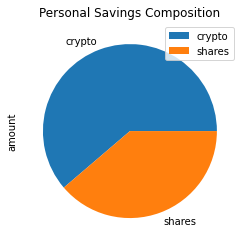

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Personal Savings Composition")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = df_savings["amount"].sum()

# Validate saving health
if total_amount > emergency_fund:
    print(f"Hooray! You have enough money in your emergency fund! Congratulations!")
elif total_amount == emergency_fund:
    print(f"Nice job, your savings is equal to your emergency fund. You hit the mark!")
else:
    print(f"Sorry, more work needs to be done! You don't have enough money in your emergency fund. You need {remaining_amount} to reach goal.")

Hooray! You have enough money in your emergency fund! Congratulations!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Drop N/As and Display sample data
df_stock_data.dropna().head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [25]:
# Printing the simulation input data
MC_stock_sim.portfolio_data.dropna().head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00   35283567.0    -0.001587  
2017-05-15 00:00:00-04:00   42230620.0     0.005083  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\RUT-VIRT-FIN-PT-11-2021-U-C\homework\05-APIsHW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999697,0.996730,0.995338,1.001379,0.987477,1.005051,1.001304,0.989628,1.000141,0.988442,...,0.986822,1.011087,1.005104,0.999225,0.990036,1.005538,0.995786,1.008724,0.994346,0.999566
2,0.997769,0.993604,0.993711,0.997619,0.995506,1.005419,0.991327,0.972790,0.998629,0.987039,...,0.996646,1.005764,1.008123,0.998510,0.992583,1.005114,1.000406,1.022404,0.994667,1.016099
3,1.004536,0.997801,0.995561,0.995064,0.985120,1.002549,0.977049,0.978486,0.988545,0.996543,...,0.996510,1.014453,1.005655,1.009869,0.985510,1.004687,1.000901,1.025042,1.004000,1.015953
4,0.991399,0.986936,0.997267,1.002618,0.984645,1.006678,0.985904,0.978363,0.976011,0.991203,...,0.997839,1.006120,0.996163,1.023224,0.992025,1.012113,1.012577,1.022172,1.013399,1.017881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.615897,14.428313,21.324982,69.394960,7.112863,31.126382,43.500687,23.633016,18.219862,11.946212,...,26.438795,37.686914,14.932809,29.062859,8.595892,8.930700,33.256354,14.320373,22.281440,22.227147
7557,25.536461,14.641459,21.352576,68.978152,7.199455,31.139788,43.553428,23.715980,18.133476,12.006048,...,26.633149,38.301028,14.903837,29.380461,8.709369,8.919707,32.874994,14.010345,22.148408,22.314627
7558,25.319257,14.616976,21.259153,68.901901,7.254598,30.909019,43.200066,23.880934,18.229335,12.067103,...,25.956267,38.517033,14.714339,29.324816,8.670926,9.067375,32.709148,13.884383,22.260894,22.521026
7559,25.079194,14.786613,21.206550,69.273700,7.241310,30.665331,42.936713,24.101508,18.210182,12.046194,...,26.206390,38.435021,14.657699,29.396628,8.728634,9.052082,32.795990,13.916923,22.030628,22.460910


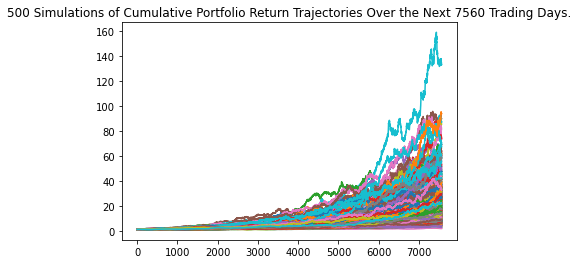

In [27]:
# Plot simulation outcomes
line_plot = MC_stock_sim.plot_simulation()

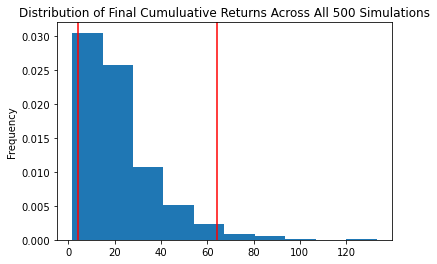

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_sim.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC_stock_sim.summarize_cumulative_return()

# Print summary statistics
table

count           500.000000
mean             22.332084
std              16.440893
min               1.714659
25%              10.772845
50%              17.767853
75%              28.868687
max             133.088974
95% CI Lower      4.289079
95% CI Upper     64.136290
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(table[8]*20000,2)
ci_upper = round(table[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85781.58 and $1282725.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table[8]*30000,2)
ci_upper = round(table[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $128672.36 and $1924088.71


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\RUT-VIRT-FIN-PT-11-2021-U-C\homework\05-APIsHW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004732,0.997358,0.984404,0.980555,0.996384,1.000213,0.986350,0.988412,0.990444,1.007633,...,1.001730,1.008412,1.000792,1.005094,0.992225,0.997474,0.991894,0.998743,0.994582,1.013495
2,1.001995,1.004046,0.985755,0.971324,0.989326,1.002457,0.983563,0.991781,0.988310,1.009780,...,1.011259,0.985047,0.994360,1.000873,0.994224,0.990198,0.998828,0.998439,1.002489,1.001299
3,1.000822,0.995007,0.976491,0.979427,0.989659,0.997409,0.978107,0.991690,0.995344,0.993146,...,1.016380,0.981473,0.985009,1.007310,0.987255,1.002024,1.003754,0.992213,1.009488,0.994449
4,1.001223,0.992532,0.969900,0.985213,0.983481,0.995542,0.958274,1.004150,0.987527,0.997127,...,1.006388,0.980130,0.988931,0.998621,0.978980,1.004367,0.998539,1.008637,1.014978,1.001444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.041210,1.848463,1.796092,1.610608,1.600799,2.927094,1.744078,1.694717,1.344555,1.284607,...,2.611231,1.695050,1.790519,1.822522,1.050843,1.266870,1.636418,2.184210,1.119017,1.754469
1257,2.029793,1.849076,1.788929,1.598298,1.593846,2.915756,1.725170,1.681793,1.340384,1.282461,...,2.587569,1.708127,1.790662,1.810942,1.055317,1.286873,1.628274,2.174730,1.113065,1.764806
1258,2.009057,1.870057,1.829927,1.604347,1.602043,2.907046,1.715361,1.641230,1.332956,1.285021,...,2.597082,1.738013,1.800097,1.814843,1.046895,1.296187,1.648491,2.168642,1.122105,1.754860
1259,2.004186,1.896271,1.810713,1.608579,1.599140,2.872058,1.722079,1.636773,1.344527,1.288253,...,2.573773,1.720710,1.789511,1.806746,1.063027,1.303483,1.657749,2.163985,1.112126,1.751080


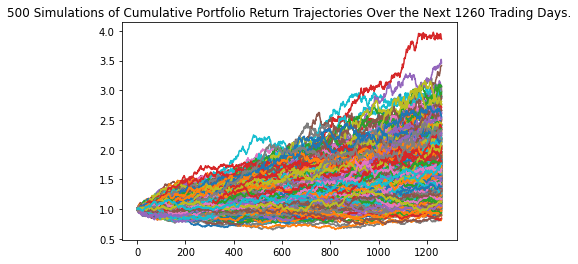

In [41]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

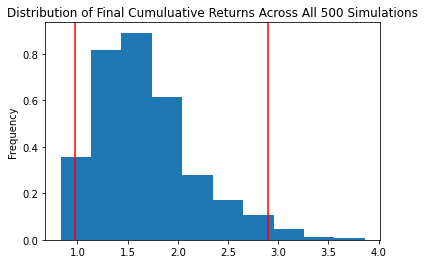

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
table_5 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
table_5

count           500.000000
mean              1.674618
std               0.488026
min               0.831206
25%               1.340418
50%               1.594052
75%               1.905040
max               3.863326
95% CI Lower      0.973932
95% CI Upper      2.893211
Name: 1260, dtype: float64

In [44]:
# Set an increased initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(table_5[8]*60000,2)
ci_upper_five = round(table_5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58435.89 and $173592.68


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\RUT-VIRT-FIN-PT-11-2021-U-C\homework\05-APIsHW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006461,0.998529,1.007108,0.999427,0.997232,1.001422,0.998903,0.987939,1.008235,0.993765,...,1.008287,1.004257,0.994433,1.005939,0.999212,0.998003,1.001927,0.980879,1.006388,1.014896
2,1.012652,0.991351,1.004197,1.007604,0.993731,1.011317,1.001081,0.984598,1.007699,0.995026,...,1.009671,1.016461,0.999418,1.005765,1.013755,0.999146,1.010641,1.001677,1.022143,1.011314
3,1.004008,0.992030,0.995049,1.000083,0.989492,1.015696,0.996079,0.993448,0.999223,1.002381,...,1.019469,1.016134,0.998277,0.992832,1.001536,1.000612,1.008774,1.005802,1.011245,1.011081
4,1.001690,1.000978,0.989373,1.006232,0.981320,1.009305,0.998499,0.998569,0.996086,0.995519,...,1.026504,1.000692,0.990224,0.984396,0.997811,1.010152,0.999906,1.014837,1.017042,1.003984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.285095,1.682596,2.765403,3.021958,4.232664,3.221271,2.733218,2.516113,4.089077,3.802670,...,2.390490,2.404833,3.567755,3.905766,4.594495,2.096753,2.250098,1.484054,2.701584,2.135693
2517,2.302115,1.691134,2.724834,3.036190,4.189429,3.236366,2.737636,2.523572,4.031489,3.765664,...,2.398685,2.420187,3.582110,3.914028,4.570570,2.102424,2.246418,1.500842,2.725072,2.159799
2518,2.324443,1.704708,2.704287,3.063819,4.181562,3.242851,2.752455,2.527425,4.051415,3.748569,...,2.370540,2.409921,3.623078,3.915890,4.468242,2.095353,2.277678,1.498688,2.730973,2.174060
2519,2.296499,1.701206,2.709217,3.067294,4.174831,3.248668,2.798737,2.580121,4.106330,3.799866,...,2.356234,2.405014,3.612641,3.904505,4.433606,2.105010,2.292563,1.489152,2.715734,2.157796


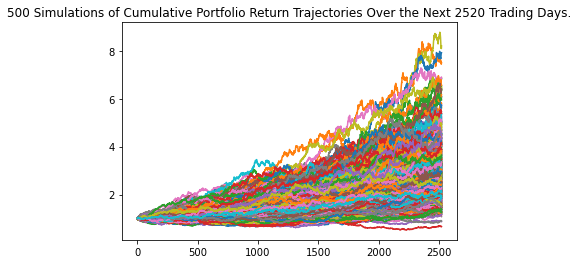

In [48]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

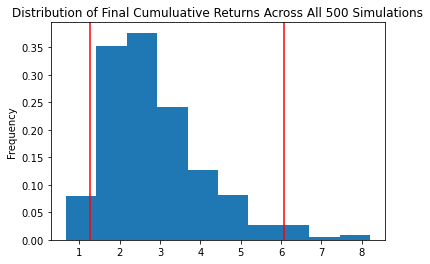

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
table_10 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
table_10

count           500.000000
mean              2.869901
std               1.217172
min               0.662566
25%               2.034845
50%               2.603587
75%               3.418937
max               8.210228
95% CI Lower      1.252328
95% CI Upper      6.080610
Name: 2520, dtype: float64

In [52]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(table_10[8]*60000,2)
ci_upper_ten = round(table_10[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $75139.65 and $364836.62
